# P2. Investigate a Dataset

## Introduction
<img style="float: center;" src="img/logo.png">

The task is to explore a provided dataset in order to get some interesting insights, and I chose the [Sean Lahman's baseball database](http://www.seanlahman.com/baseball-archive/statistics/) as the source of data.

I picked it over other options because it looks like something not many people have looked into (Titanic dataset seems to be much more popular), and also since I've been impressed by the story of [Billy Beane](https://en.wikipedia.org/wiki/Billy_Beane), who was the first to apply statistical analysis to the players' data in order to evaluate them.

This became known as ["sabermetrics"](https://en.wikipedia.org/wiki/Sabermetrics) and the whole story was popularized later via a book and a movie ["Moneyball"](https://en.wikipedia.org/wiki/Moneyball).

<img style="float: center;" src="img/pitt.jpg">

Being a non-american, I also don't have much clue about baseball, so it's a nice opportunity to learn about the sport.

##  Questions to the data

Ideally, one would hope to repeat Billy Beane's success and find how player/team performance correlates with different attributes. 

But since we yet don't know much about those attributes, let's explore the data first. 

##  Data exploration

Let's start from the top-down view of the data, and then proceed with drilling into more details. 

In [1]:
# initial setup/imports
%matplotlib inline
import os
import IPython.core.display as disp

import matplotlib as mpl, numpy as np, pandas as pd, seaborn as sns
import chorogrid 

###  General structure

There is an archive with a set of CSV files and a couple of text files (readme*.txt). Let's unpack the files into the "data" folder. 

The CSV files are:

In [2]:
dir_root = "data/2016/"
files = sorted([f for f in os.listdir(dir_root) 
                if f.endswith('.csv')])
files

['AllstarFull.csv',
 'Appearances.csv',
 'AwardsManagers.csv',
 'AwardsPlayers.csv',
 'AwardsShareManagers.csv',
 'AwardsSharePlayers.csv',
 'Batting.csv',
 'BattingPost.csv',
 'CollegePlaying.csv',
 'Fielding.csv',
 'FieldingOF.csv',
 'FieldingOFsplit.csv',
 'FieldingPost.csv',
 'HallOfFame.csv',
 'HomeGames.csv',
 'Managers.csv',
 'ManagersHalf.csv',
 'Master.csv',
 'Parks.csv',
 'Pitching.csv',
 'PitchingPost.csv',
 'Salaries.csv',
 'Schools.csv',
 'SeriesPost.csv',
 'Teams.csv',
 'TeamsFranchises.csv',
 'TeamsHalf.csv']

We can see the list of "tables" with data that are available. Also, there is a text file ("readme2016.txt") in the same folder, which has a very short description of each table and its columns. It's a good start.

Let's print the head and statistics for each table.

In [3]:
import pandas as pd

tables = {}
for f in files:
    name = f.split('.')[0]
    tables[name] = pd.read_csv(dir_root + f)

HEADER_FORMAT = '<hr/><h4 style="color:steelblue;">{}</h4>{} rows'    
for name in sorted(tables.keys()):
    table = tables[name]
    disp.display(disp.HTML(HEADER_FORMAT.format(name, len(table))))
    disp.display(table.head(), table.describe())

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


,yearID,gameNum,GP,startingPos
count,5148.000000,5148.000000,5129.000000,1600.000000
mean,1977.040210,0.134810,0.777929,5.031250
std,24.008874,0.458167,0.415679,2.657007
min,1933.000000,0.000000,0.000000,0.000000
25%,1958.000000,0.000000,1.000000,3.000000
50%,1977.000000,0.000000,1.000000,5.000000
75%,1999.000000,0.000000,1.000000,7.000000
max,2016.000000,2.000000,1.000000,10.000000


,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,2,0,0,0,29,0,29,NaN,NaN,NaN
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,2,20,0,1,0,0,1,NaN,NaN,NaN


,yearID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
count,102761.000000,102761.000000,90166.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,102761.000000,90166.000000,90166.000000,90166.000000
mean,1964.270219,51.380942,37.101601,48.417571,46.845243,10.362978,4.733615,4.588667,4.570304,4.587548,4.558850,4.840786,4.571005,4.702737,13.798708,1.260952,4.397167,0.806768
std,38.851188,47.126638,47.230209,48.889453,45.377191,16.963018,18.928323,20.713830,20.470539,20.325324,21.152432,19.019660,20.190575,19.296453,34.714992,8.443146,8.936892,2.521176
min,1871.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,13.000000,1.000000,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,34.000000,16.000000,31.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,80.000000,55.000000,80.000000,70.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
max,2016.000000,165.000000,164.000000,165.000000,165.000000,106.000000,160.000000,162.000000,163.000000,164.000000,165.000000,163.000000,162.000000,162.000000,164.000000,162.000000,95.000000,92.000000


,playerID,awardID,yearID,lgID,tie,notes
0,larusto01,BBWAA Manager of the Year,1983,AL,NaN,NaN
1,lasorto01,BBWAA Manager of the Year,1983,NL,NaN,NaN
2,andersp01,BBWAA Manager of the Year,1984,AL,NaN,NaN
3,freyji99,BBWAA Manager of the Year,1984,NL,NaN,NaN
4,coxbo01,BBWAA Manager of the Year,1985,AL,NaN,NaN


,yearID
count,179.000000
mean,1988.921788
std,20.872123
min,1936.000000
25%,1980.500000
50%,1994.000000
75%,2005.000000
max,2016.000000


,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


,yearID
count,6158.000000
mean,1969.076648
std,30.841987
min,1877.000000
25%,1942.000000
50%,1975.000000
75%,1995.000000
max,2016.000000


,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,BBWAA Manager of the Year,1983,AL,altobjo01,7,28.0,7
1,BBWAA Manager of the Year,1983,AL,coxbo01,4,28.0,4
2,BBWAA Manager of the Year,1983,AL,larusto01,17,28.0,17
3,BBWAA Manager of the Year,1983,NL,lasorto01,10,24.0,10
4,BBWAA Manager of the Year,1983,NL,lillibo01,9,24.0,9


,yearID,pointsWon,pointsMax,votesFirst
count,425.000000,425.000000,414.000000,425.000000
mean,2000.197647,40.117647,141.932367,4.567059
std,9.518527,41.601323,19.191283,7.057436
min,1983.000000,1.000000,24.000000,0.000000
25%,1992.000000,4.000000,140.000000,0.000000
50%,2000.000000,23.000000,140.000000,1.000000
75%,2009.000000,70.000000,150.000000,6.000000
max,2016.000000,154.000000,160.000000,30.000000


,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


,yearID,pointsWon,pointsMax,votesFirst
count,6879.000000,6879.000000,6879.000000,6521.000000
mean,1972.461259,43.559674,267.518389,1.624751
std,27.707848,68.265957,128.988138,4.911428
min,1911.000000,0.000000,16.000000,0.000000
25%,1950.000000,4.000000,140.000000,0.000000
50%,1975.000000,12.000000,336.000000,0.000000
75%,1996.000000,53.000000,336.000000,0.000000
max,2016.000000,448.000000,448.000000,32.000000


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1884,WS,becanbu01,NY4,AA,1,2,0,1,0,...,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN
1,1884,WS,bradyst01,NY4,AA,3,10,1,0,0,...,0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
2,1884,WS,carrocl01,PRO,NL,3,10,2,1,0,...,1,0,NaN,1,1,0,NaN,NaN,NaN,NaN
3,1884,WS,dennyje01,PRO,NL,3,9,3,4,0,...,2,0,NaN,0,3,0,NaN,NaN,NaN,NaN
4,1884,WS,esterdu01,NY4,AA,3,10,0,3,1,...,0,1,NaN,0,3,0,NaN,NaN,NaN,NaN


,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,13543.000000,13543.00000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13342.00000,13543.000000,13543.000000,13543.000000,13342.000000,13342.000000,13342.000000,13342.000000
mean,1985.506904,3.13771,7.803072,0.929041,1.895149,0.331094,0.048660,0.193679,0.862438,0.149967,0.06903,0.733442,1.488740,0.081223,0.063109,0.104257,0.049393,0.148329
std,29.683760,1.88720,8.878143,1.528511,2.625735,0.705140,0.236422,0.532574,1.574862,0.573527,0.29327,1.300220,1.965664,0.348283,0.271150,0.365269,0.233992,0.419295
min,1884.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,3.00000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2007.000000,4.00000,15.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,15.00000,66.000000,13.000000,21.000000,6.000000,4.000000,6.000000,13.000000,15.000000,5.00000,13.000000,13.000000,7.000000,4.000000,5.000000,3.000000,5.000000


,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


,yearID
count,17350.000000
mean,1969.490259
std,32.783259
min,1864.000000
25%,1949.000000
50%,1981.000000
75%,1995.000000
max,2014.000000


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
count,136815.000000,136815.000000,136815.000000,85273.000000,85273.000000,136815.000000,136814.000000,136813.000000,136814.000000,11230.000000,4189.000000,6138.000000,6138.000000,4189.000000
mean,1961.653349,1.076812,35.445792,26.680626,716.201693,83.385469,35.324265,3.859282,7.290058,5.147996,11.772977,24.859726,12.005865,0.703032
std,40.949885,0.282308,41.482180,40.731792,1067.250667,186.285168,79.618300,7.962017,19.616904,9.078281,12.249974,25.714221,13.155354,1.394882
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1928.000000,1.000000,5.000000,0.000000,58.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000
50%,1972.000000,1.000000,19.000000,7.000000,226.000000,10.000000,7.000000,1.000000,1.000000,2.000000,8.000000,17.000000,8.000000,0.000000
75%,1997.000000,1.000000,48.000000,32.000000,752.000000,75.000000,27.000000,4.000000,3.000000,6.000000,19.000000,39.000000,19.000000,1.000000
max,2016.000000,5.000000,165.000000,164.000000,4469.000000,1846.000000,641.000000,119.000000,194.000000,105.000000,69.000000,155.000000,89.000000,15.000000


,playerID,yearID,stint,Glf,Gcf,Grf
0,allisar01,1871,1,0.0,29.0,0.0
1,ansonca01,1871,1,1.0,0.0,0.0
2,armstbo01,1871,1,0.0,11.0,1.0
3,barkeal01,1871,1,1.0,0.0,0.0
4,barrofr01,1871,1,13.0,0.0,4.0


,yearID,stint,Glf,Gcf,Grf
count,12028.000000,12028.000000,11991.000000,11991.000000,11985.000000
mean,1912.736448,1.086548,15.740639,15.574598,15.755695
std,23.723650,0.306644,33.289793,34.599550,33.078331
min,1871.000000,1.000000,0.000000,0.000000,0.000000
25%,1891.000000,1.000000,0.000000,0.000000,0.000000
50%,1912.000000,1.000000,1.000000,1.000000,1.000000
75%,1933.000000,1.000000,11.000000,8.000000,11.000000
max,1955.000000,5.000000,156.000000,162.000000,160.000000


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,aaronha01,1954,1,ML1,NL,LF,105,102.0,2773.0,205.0,4.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN
1,aaronha01,1954,1,ML1,NL,RF,11,11.0,320.0,12.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,abramca01,1954,1,PIT,NL,LF,5,5.0,120.0,12.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,abramca01,1954,1,PIT,NL,RF,8,6.0,173.0,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,abramca01,1954,2,BAL,AL,CF,12,12.0,300.0,36.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


,yearID,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
count,31291.000000,31291.000000,31291.000000,20921.000000,20921.000000,21548.000000,21548.000000,21548.000000,21548.000000,0.0,0.0,0.0,0.0,0.0
mean,1988.649516,1.085296,28.832412,24.410019,656.014435,53.385140,1.667672,1.120893,0.344580,NaN,NaN,NaN,NaN,NaN
std,17.397249,0.295451,40.046401,38.857202,1023.007819,87.007142,3.052435,2.050349,0.839418,NaN,NaN,NaN,NaN,NaN
min,1954.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1974.000000,1.000000,3.000000,1.000000,38.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,1990.000000,1.000000,10.000000,6.000000,177.000000,14.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2004.000000,1.000000,35.000000,27.000000,719.000000,57.000000,2.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,2016.000000,4.000000,163.000000,163.000000,4438.000000,509.000000,30.000000,19.000000,9.000000,NaN,NaN,NaN,NaN,NaN


,playerID,yearID,teamID,lgID,round,POS,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
0,beaumgi01,1903,PIT,NL,WS,CF,8,8,210,21,0,0,0,0,NaN,NaN,NaN
1,branski01,1903,PIT,NL,WS,1B,8,8,210,81,6,3,5,0,NaN,NaN,NaN
2,clarkfr01,1903,PIT,NL,WS,LF,8,8,210,18,0,1,0,0,NaN,NaN,NaN
3,colliji01,1903,BOS,AL,WS,3B,8,8,213,9,18,1,1,0,NaN,NaN,NaN
4,crigelo01,1903,BOS,AL,WS,C,8,8,213,54,7,3,2,0,0.0,9.0,3.0


,yearID,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
count,12714.000000,12714.000000,12714.000000,12714.000000,12714.000000,12714.000000,12714.000000,12714.000000,12714.000000,1002.000000,1289.000000,1289.000000
mean,1987.339862,2.937471,2.136385,57.491269,6.387683,2.428583,0.186645,0.526270,0.000079,0.200599,0.670287,0.570985
std,27.306302,1.832593,2.221430,57.286623,11.235395,4.595591,0.522302,1.258644,0.008869,0.488304,1.438942,1.135862
min,1903.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,3.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2007.000000,4.000000,4.000000,104.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2016.000000,8.000000,8.000000,222.000000,91.000000,33.000000,8.000000,13.000000,1.000000,3.000000,15.000000,10.000000


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


,yearid,ballots,needed,votes
count,4156.000000,3961.000000,3804.000000,3961.000000
mean,1969.306304,321.746529,244.776551,51.465791
std,23.231639,125.455368,94.497219,85.473954
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1966.000000,274.000000,213.000000,10.000000
75%,1988.000000,427.000000,323.000000,64.000000
max,2017.000000,581.000000,436.000000,555.000000


,year.key,league.key,team.key,park.key,span.first,span.last,games,openings,attendance
0,1871,NaN,BS1,BOS01,1871-05-16,1871-10-07,16,16,32600
1,1871,NaN,BS1,NYC01,1871-05-27,1871-05-27,1,1,3000
2,1871,NaN,CH1,CHI01,1871-05-08,1871-09-29,16,15,85500
3,1871,NaN,CH1,NYC01,1871-10-30,1871-10-30,1,1,600
4,1871,NaN,CL1,CIN01,1871-05-13,1871-07-22,2,2,2200


,year.key,games,openings,attendance
count,3006.000000,3006.000000,3006.000000,3.006000e+03
mean,1953.417498,70.960413,50.057219,1.107540e+06
std,42.949179,19.691534,33.037639,1.041145e+06
min,1871.000000,1.000000,0.000000,0.000000e+00
25%,1915.000000,74.000000,8.000000,6.055000e+04
50%,1961.000000,79.000000,67.000000,9.145680e+05
75%,1992.000000,81.000000,79.000000,1.858664e+06
max,2016.000000,89.000000,83.000000,4.483203e+06


,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
0,wrighha01,1871,BS1,NaN,1,31,20,10,3.0,Y
1,woodji01,1871,CH1,NaN,1,28,19,9,2.0,Y
2,paborch01,1871,CL1,NaN,1,29,10,19,8.0,Y
3,lennobi01,1871,FW1,NaN,1,14,5,9,8.0,Y
4,deaneha01,1871,FW1,NaN,2,5,2,3,8.0,Y


,yearID,inseason,G,W,L,rank
count,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3435.000000
mean,1954.223516,1.233120,124.168510,61.729627,61.738068,4.339738
std,42.078606,0.596025,50.414981,28.746768,26.417168,2.396520
min,1871.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1918.000000,1.000000,91.000000,42.000000,46.000000,2.000000
50%,1962.000000,1.000000,154.000000,70.000000,68.000000,4.000000
75%,1991.000000,1.000000,162.000000,84.000000,81.000000,6.000000
max,2016.000000,9.000000,165.000000,116.000000,120.000000,12.000000


,playerID,yearID,teamID,lgID,inseason,half,G,W,L,rank
0,hanlone01,1892,BLN,NL,3,1,56,17,39,12
1,hanlone01,1892,BLN,NL,3,2,77,26,46,10
2,vanhage01,1892,BLN,NL,1,1,11,1,10,12
3,waltzjo99,1892,BLN,NL,2,1,8,2,6,12
4,wardjo01,1892,BRO,NL,1,1,78,51,26,2


,yearID,inseason,half,G,W,L,rank
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1947.505376,1.387097,1.483871,49.784946,24.645161,24.645161,5.161290
std,43.351351,0.752276,0.502448,19.150916,12.218700,9.389686,3.194051
min,1892.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000
25%,1892.000000,1.000000,1.000000,47.000000,16.000000,21.000000,3.000000
50%,1981.000000,1.000000,1.000000,53.000000,25.000000,25.000000,5.000000
75%,1981.000000,2.000000,2.000000,57.000000,31.000000,30.000000,7.000000
max,1981.000000,5.000000,2.000000,80.000000,53.000000,46.000000,12.000000


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18973.000000,18803.000000,18656.000000,9441.000000,9440.000000,9439.000000,18251.000000,18320.000000
mean,1931.435356,6.629474,15.614816,1964.287364,6.483581,15.569552,186.375596,72.273799
std,41.555514,3.468103,8.750216,31.808030,3.529655,8.779552,21.524765,2.603904
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1895.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1937.000000,7.000000,16.000000,1967.000000,6.000000,15.000000,185.000000,72.000000
75%,1969.000000,10.000000,23.000000,1990.000000,10.000000,23.000000,200.000000,74.000000
max,1996.000000,12.000000,31.000000,2017.000000,12.000000,31.000000,320.000000,83.000000


,park.key,park.name,park.alias,city,state,country
0,ALB01,Riverside Park,NaN,Albany,NY,US
1,ALT01,Columbia Park,NaN,Altoona,PA,US
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,US
3,ARL01,Arlington Stadium,NaN,Arlington,TX,US
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Field,Arlington,TX,US


,park.key,park.name,park.alias,city,state,country
count,249,249,57,249,248,249
unique,249,239,56,84,35,6
top,CHI09,Athletic Park,Federal League Park,Philadelphia,NY,US
freq,1,4,2,14,40,241


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,becanbu01,1884,WS,NY4,AA,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,0,12,NaN,NaN,NaN
1,keefeti01,1884,WS,NY4,AA,0,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,9,NaN,NaN,NaN
2,radboch01,1884,WS,PRO,NL,3,0,3,3,3,...,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN
3,carutbo01,1885,WS,SL4,AA,1,1,3,3,3,...,NaN,NaN,NaN,NaN,NaN,0,18,NaN,NaN,NaN
4,clarkjo01,1885,WS,CHN,NL,0,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,14,NaN,NaN,NaN


,yearID,W,L,G,GS,CG,SHO,SV,IPouts,H,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,...,5221.000000,5221.000000,5221.000000,5221.000000,5221.000000,5271.000000,5271.000000,5221.000000,5221.000000,5221.000000
mean,1988.439385,0.297097,0.297097,1.914437,0.596471,0.125213,0.027130,0.109467,16.011383,4.869285,...,0.210688,0.145566,0.161272,0.013024,21.838154,0.471258,2.388162,0.266424,0.126221,0.379046
std,27.602733,0.558995,0.531859,1.014170,0.808481,0.474263,0.170456,0.420950,15.247467,4.748613,...,0.495235,0.412768,0.418950,0.113389,18.616765,0.838970,2.772179,0.605278,0.367715,0.689392
min,1884.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,2008.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,21.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,4.000000,0.000000,0.000000,1.000000
max,2016.000000,4.000000,4.000000,8.000000,8.000000,8.000000,3.000000,4.000000,213.000000,64.000000,...,4.000000,5.000000,3.000000,1.000000,178.000000,6.000000,36.000000,7.000000,4.000000,6.000000


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


,schoolID,name_full,city,state,country
count,1207,1207,1207,1207,1207
unique,1207,1199,856,49,1
top,ohcuyah,Southwestern College,Chicago,CA,USA
freq,1,2,9,136,1207


,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
0,1884,WS,PRO,NL,NY4,AA,3,0,0
1,1885,WS,CHN,NL,SL4,AA,3,3,1
2,1886,WS,SL4,AA,CHN,NL,4,2,0
3,1887,WS,DTN,NL,SL4,AA,10,5,0
4,1888,WS,NY1,NL,SL4,AA,6,4,0


,yearID,wins,losses,ties
count,316.000000,316.000000,316.000000,316.000000
mean,1982.360759,3.550633,1.408228,0.009494
std,32.724093,0.801170,1.107462,0.097126
min,1884.000000,1.000000,0.000000,0.000000
25%,1970.750000,3.000000,0.000000,0.000000
50%,1995.000000,4.000000,1.000000,0.000000
75%,2007.000000,4.000000,2.000000,0.000000
max,2016.000000,10.000000,5.000000,1.000000


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2835.000000,2835.000000,2835.000000,2436.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,...,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2518.000000,2835.000000,2.556000e+03,2835.000000,2835.000000
mean,1955.681834,4.095238,150.469841,78.496305,74.814109,74.814109,682.399295,5146.473369,1346.939330,228.127690,...,1346.751675,102.045150,474.316755,737.241623,185.365432,140.237490,0.965447,1.357173e+06,100.197531,100.223280
std,41.767356,2.318674,23.134065,4.677657,17.591208,17.331455,135.224393,747.595825,218.926978,58.633383,...,218.656539,58.648758,131.328309,300.673368,107.508483,29.218873,0.029437,9.510391e+05,4.903349,4.834146
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.765000,6.088000e+03,60.000000,60.000000
25%,1920.000000,2.000000,154.000000,77.000000,66.000000,65.000000,614.000000,5132.000000,1300.000000,193.500000,...,1289.000000,47.000000,429.000000,503.000000,116.000000,127.000000,0.965000,5.348265e+05,97.000000,97.000000
50%,1964.000000,4.000000,157.000000,81.000000,77.000000,76.000000,690.000000,5395.000000,1393.000000,231.000000,...,1392.000000,110.000000,494.000000,740.000000,145.000000,145.000000,0.976000,1.154750e+06,100.000000,100.000000
75%,1993.000000,6.000000,162.000000,81.000000,87.000000,87.000000,763.000000,5518.000000,1467.000000,271.000000,...,1470.000000,150.000000,554.000000,972.000000,215.000000,159.000000,0.981000,2.042453e+06,103.000000,103.000000
max,2016.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,258.000000,827.000000,1510.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


,franchID,franchName,active,NAassoc
0,ALT,Altoona Mountain City,N,NaN
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
3,ATH,Philadelphia Athletics,N,PNA
4,ATL,Atlanta Braves,Y,BNA


,franchID,franchName,active,NAassoc
count,120,120,95,12
unique,120,99,2,12
top,MIN,Washington Nationals,N,CNA
freq,1,5,65,1


,yearID,lgID,teamID,Half,divID,DivWin,Rank,G,W,L
0,1981,NL,ATL,1,W,N,4,54,25,29
1,1981,NL,ATL,2,W,N,5,52,25,27
2,1981,AL,BAL,1,E,N,2,54,31,23
3,1981,AL,BAL,2,E,N,4,51,28,23
4,1981,AL,BOS,1,E,N,5,56,30,26


,yearID,Half,Rank,G,W,L
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1981.0,1.500000,3.692308,53.423077,26.711538,26.711538
std,0.0,0.504878,1.842190,2.872084,5.333345,5.184201
min,1981.0,1.000000,1.000000,48.000000,15.000000,20.000000
25%,1981.0,1.000000,2.000000,52.000000,23.000000,23.000000
50%,1981.0,1.500000,4.000000,53.000000,27.000000,26.000000
75%,1981.0,2.000000,5.000000,56.000000,31.000000,29.000000
max,1981.0,2.000000,7.000000,60.000000,37.000000,42.000000


Looking at the above, together with the readme file, some first observations:

The main table with player (and manager) data, called `Master`, with the primary key `playerID` (used in other tables to reference the player), contains data about all players:
*  Name 
*  Birth date and death date (if applicable)
*  Birth Country/State/City
*  Weight and height
*  First and final game dates
*  Player batting and throwing hand (left, right or both)

Other interesting tables are:
* `Salaries` - what looks like a yearly salary in dollars, keyed by the `playerID`, together with the year/team/league of playing. One can ask many interesting questions involving player salaries.
* `Batting`, `Pitching`, `Fielding` - corresponding detailed statistics for players, by year, team etc. This is where the "meat" of the data is, presumably allowing us to compute player performance according to both the [traditional methods and sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics#Batting_measurements). That computed performance can be correlated with things like team wins, salary etc.
* `Managers` - data about team managers. How many team losses, wins and whether the manager is a former player.
* `Teams` - team performance by year (teams are keyed by `teamID`)
* `Appearances` - shows in which team and which roles the players appeared
* `CollegePlaying`/`Schools` - allow to see which players started their career playing in college teams
* `AwardsManagers`/`AwardsPlayers` - awards, won by managers and players

#### Remark about the data cleaning

The data already nicely organized into a tabular shape, with primary keys being unique etc.:

In [4]:
def check_unique(table_name, column_name):
    t = tables[table_name][column_name]
    print('Table {}, column {} is {}unique!'.format(
        table_name, column_name, '' if t.nunique() == len(t) else 'NOT '))

PRIMARY_KEYS = [
    ('Master', 'playerID'),
    ('Schools', 'schoolID')
]

for t, c in PRIMARY_KEYS:
    check_unique(t, c)

Table Master, column playerID is unique!
Table Schools, column schoolID is unique!


...which is not surprising, given that these CSV files where presumably created via export from a relational database.

However, one should note that there is a lot of missing data (which pandas shows as `NaN`), almost for every column. This is the case for all the other tables (which is quite expected), so let's keep this always in mind.

Another thing to pay attention to: in some cases missing data is not necessarily represented by a `NaN`, but can be also e.g. a zero value (such as in `Salaries` table).

We should be also mindful about things like inflation over the years when making computations with money (salaries), so that apples are compared to apples.

### Looking closer at the data

Based only on the `Master` table, there may already be some curious things to look at:
*  Player origin distribution
*  Weight/height statistics for baseball players, as compared with population median
*  At what age players start and end their careers 
*  Left/Right handed players ratio
*  Horoscope signs distribution among the player (rather useless knowledge, but why not)

In [5]:
MASTER = tables['Master']

#### Player origins

Not surprisingly, most of the players were born in USA, but there are also quite a few players from Dominican Republic, Venezuela, Puerto Rico, Canada, Cuba and Mexico (which is also expected - all of these countries are in Americas).

USA          16694
D.R.           670
Venezuela      358
P.R.           257
CAN            246
Cuba           204
Mexico         121
Japan           63
Panama          55
Ireland         50
Name: birthCountry, dtype: int64

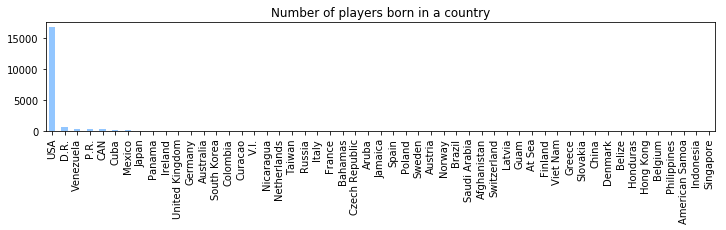

In [6]:
mpl.style.use('seaborn-pastel')
country_counts = MASTER['birthCountry'].value_counts()
country_counts.plot(kind='bar', figsize=(12, 2), title='Number of players born in a country')
country_counts.head(10)

What about `birthState` distribution? Is there some particular "baseball state"?

In [7]:
pc = MASTER['birthState'].value_counts()
player_counts = pd.DataFrame({'abbr':pc.index, 'players_born':pc.values})
player_counts.head()

,abbr,players_born
0,CA,2193
1,PA,1425
2,NY,1216
3,IL,1057
4,OH,1041


California, Pennsylvania and New York have the most. But then, these are the most populated states.

Let's try how does it look relative to the state population. Using an information about states' population from a text file `US-States.txt`, compute the value of `micro_players_per_capita` (which is baseball players per capita, born in this state and multiplied by one million):

In [8]:
def parse_state(line):
    name, abbr, pop = line.strip().split(',')
    return (name, abbr, int(pop))

state_pop = pd.DataFrame(
    (parse_state(line) for line in open('data/US-States.txt', 'r')),
    columns=['name', 'abbr', 'population'])

state_data = state_pop.merge(player_counts, on='abbr', how='left')

state_data['micro_players_per_capita'] = \
    1e+6*state_data['players_born']/state_data['population']
    
state_data.sort_values(['micro_players_per_capita'], 
                       ascending=False).head()

,name,abbr,population,players_born,micro_players_per_capita
47,Washington D.C.,DC,572059,102,178.303287
37,Pennsylvania,PA,12281054,1425,116.032386
24,Missouri,MO,5595211,607,108.485632
20,Massachusetts,MA,6349097,667,105.054309
34,Ohio,OH,11353140,1041,91.692695


Let's use a ["squared choropleth" map](https://github.com/Prooffreader/chorogrid) to display which states give birth to the most baseball players:  

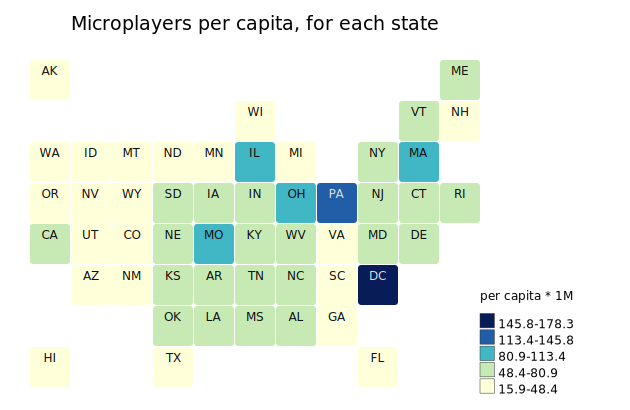

In [56]:
cmap = mpl.cm.get_cmap('YlGnBu', 5)
colors = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cbin = chorogrid.Colorbin(state_data['micro_players_per_capita'], 
                          colors, proportional=True, decimals=None)
cbin.set_decimals(1)
cbin.recalc(fenceposts=True)
cbin.calc_complements(0.5, '#e0e0e0', '#101010')

colors_by_state = cbin.colors_out
font_colors_by_state = cbin.complements
legend_colors = cbin.colors_in
legend_labels = cbin.labels

cg = chorogrid.Chorogrid('data/usa_states.csv', state_data['abbr'], colors_by_state)
cg.set_title('Microplayers per capita, for each state', font_dict={'font-size': 19})
cg.set_legend(legend_colors, legend_labels, title='per capita * 1M')
cg.draw_squares(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state) 
cg.done(show=True)

GO WASHINGTON D.C.!!!

(also, New Mexico has the lowest players per capita, but I guess they must have an excuse for that)

#### Zodiac distribution

Ah, Zodiac. Pointless, but fun.

Let's enhance out `Master` table with a Zodiac sign for every player:

In [53]:
zodiac = pd.read_csv('data/zodiac.csv', sep=';', header=0)

def get_sign(master_row):
    month, day = master_row[['birthMonth', 'birthDay']]
    if np.isnan(month) or np.isnan(day):
        return np.NaN
    for _, s, ds, ms, de, me in zodiac.itertuples():
        if (month == ms and day >= ds) or \
           (month == me and day <= de) or \
           (ms < month < me):
            return s
    return np.NaN

MASTER['zodiacSign'] = MASTER.apply(get_sign, axis=1)

In [54]:
pc = MASTER['zodiacSign'].value_counts()
zodiac = zodiac.merge(pd.DataFrame({'sign':pc.index, 'playersOfSign':pc.values}), 
                      on='sign', how='left')

,sign,day_start,month_start,day_end,month_end,playersOfSign
0,Aries,20,3,19,4,1498
1,Taurus,20,4,20,5,1417
2,Gemini,21,5,20,6,1424
3,Cancer,21,6,22,7,1523
4,Leo,23,7,22,8,1681
5,Virgo,23,8,22,9,1749
6,Libra,23,9,22,10,1695
7,Scorpio,23,10,21,11,1651
8,Sagittarius,22,11,21,12,1535
9,Capricorn,22,12,19,1,1496


http://www.slate.com/articles/sports/sports_nut/2008/04/the_boys_of_late_summer.html

In [68]:
MASTER[(MASTER['birthYear'] > 1950) & (MASTER['birthYear'] <= 2005) & (MASTER['birthCountry'] == 'USA')]['birthMonth'].value_counts()

8.0     669
9.0     598
10.0    578
11.0    518
1.0     505
12.0    504
4.0     491
3.0     487
5.0     458
2.0     449
7.0     426
6.0     421
Name: birthMonth, dtype: int64

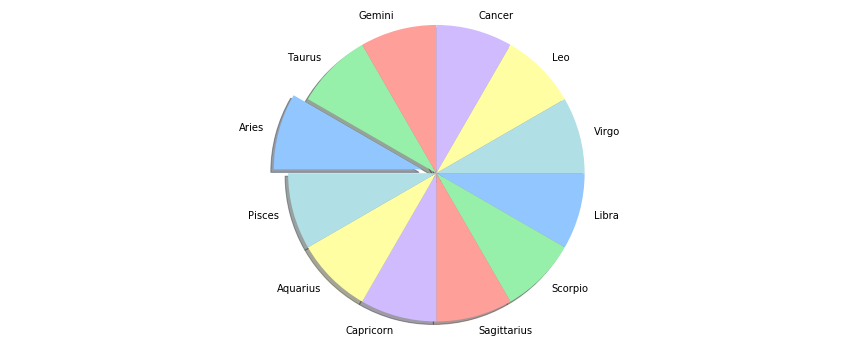

In [27]:
import matplotlib.pyplot as plt

labels = zodiac.sign
sizes = [1]*12
explode = [0]*12
explode[0] = 0.1

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='', shadow=True, counterclock=False, startangle=180)
ax1.axis('equal')  
plt.show()